# News Headline Classification Notebook

## Overview
This notebook demonstrates the process of classifying news headlines into two tasks:
1. **Category Classification**: Predicting the topic of a news headline.
2. **Sentiment Analysis**: Predicting the sentiment (positive, negative, neutral) of a news headline.

## Workflow
1. Data Preprocessing:
    - Load and preprocess the dataset.
    - Encode labels and vectorize text using TF-IDF.
2. Model Training and Evaluation:
    - Train various classifiers on both tasks (category and sentiment).
    - Evaluate performance using metrics like precision, recall, and F1-score.

## Classifiers
The following classifiers are implemented:
- Support Vector Machine (SVM)
- Random Forest
- XGBoost
- Naive Bayes
- Multi-Layer Perceptron (MLP)
- K-Nearest Neighbors (KNN)
- Logistic Regression


In [2]:
import re
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
file_path = r"C:\Users\rasha\Downloads\Sapaq news headlines.xlsx"
sheet_name = "Cleaned Data"
data = pd.read_excel(file_path, sheet_name=sheet_name)  # Read data from the specified sheet
# Remove punctuation from the news headlines
def remove_punctuation(text):
    """
    Removes punctuation from a given text.
    
    Args:
    text (str): The input text.

    Returns:
    str: The cleaned text without punctuation.
    """
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to clean the headlines
data['News Headlines'] = data['News Headlines'].apply(remove_punctuation)

# Features and targets
X = data['News Headlines']  # Cleaned news headlines (text data)
y_category = data['category']  # Predicting categories (e.g., Sports, Politics)
y_annotation = data['Final sentiment Annotation ']  # Predicting sentiment (positive, negative, neutral)

# Encode target variables
category_encoder = LabelEncoder()
annotation_encoder = LabelEncoder()
y_category = category_encoder.fit_transform(y_category)
y_annotation = annotation_encoder.fit_transform(y_annotation)

# Split dataset into training and testing sets with stratified sampling
X_train, X_test, y_category_train, y_category_test = train_test_split(
    X, y_category, test_size=0.2, random_state=42, stratify=y_category
)
X_train_ann, X_test_ann, y_annotation_train, y_annotation_test = train_test_split(
    X, y_annotation, test_size=0.2, random_state=42, stratify=y_annotation
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 1. SVM Classifier



In [3]:
# Import the SVM classifier and evaluation metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train and evaluate SVM for Category Prediction
# SVM is effective for text classification due to its ability to handle high-dimensional data
svm_category_model = SVC(kernel='linear', random_state=42)  # Use a linear kernel
svm_category_model.fit(X_train_tfidf, y_category_train)  # Train the model
y_category_svm_pred = svm_category_model.predict(X_test_tfidf)  # Predict on test data
print("SVM - Category Prediction Report:")
print(classification_report(y_category_test, y_category_svm_pred, target_names=category_encoder.classes_))

# Train and evaluate SVM for Sentiment Prediction
# Separate SVM model is trained for sentiment analysis
svm_sentiment_model = SVC(kernel='linear', random_state=42)
svm_sentiment_model.fit(X_train_tfidf, y_annotation_train)
y_sentiment_svm_pred = svm_sentiment_model.predict(X_test_tfidf)
print("SVM - Sentiment Prediction Report:")
print(classification_report(y_annotation_test, y_sentiment_svm_pred, target_names=annotation_encoder.classes_))


SVM - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.95      1.00      0.98        20
       Sport       0.95      0.95      0.95        20
     Tourism       0.83      1.00      0.91        20
       World       1.00      0.90      0.95        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100

SVM - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.41      0.26      0.32        34
     Neutral       0.00      0.00      0.00        19
    Positive       0.47      0.79      0.59        47

    accuracy                           0.46       100
   macro avg       0.29      0.35      0.30       100
weighted avg       0.36      0.46      0.39       100



C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2. Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train and evaluate Random Forest for Category Prediction
# Random Forest is an ensemble method that builds multiple decision trees and averages their predictions
rf_category_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_category_model.fit(X_train_tfidf, y_category_train)  # Train the model
y_category_rf_pred = rf_category_model.predict(X_test_tfidf)  # Predict on test data
print("Random Forest - Category Prediction Report:")
print(classification_report(y_category_test, y_category_rf_pred, target_names=category_encoder.classes_))

# Train and evaluate Random Forest for Sentiment Prediction
# Separate Random Forest model for sentiment analysis
rf_sentiment_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sentiment_model.fit(X_train_tfidf, y_annotation_train)
y_sentiment_rf_pred = rf_sentiment_model.predict(X_test_tfidf)
print("Random Forest - Sentiment Prediction Report:")
print(classification_report(y_annotation_test, y_sentiment_rf_pred, target_names=annotation_encoder.classes_))


Random Forest - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.53      0.95      0.68        20
       Sport       1.00      0.65      0.79        20
     Tourism       0.86      0.95      0.90        20
       World       0.92      0.55      0.69        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.79       100
   macro avg       0.86      0.79      0.80       100
weighted avg       0.86      0.79      0.80       100

Random Forest - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.53      0.26      0.35        34
     Neutral       0.12      0.05      0.07        19
    Positive       0.49      0.79      0.61        47

    accuracy                           0.47       100
   macro avg       0.38      0.37      0.34       100
weighted avg       0.44      0.47      0.42       100



# 3. XGBoost Classifier

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train and evaluate XGBoost for Category Prediction
# XGBoost is a gradient boosting framework optimized for speed and accuracy
xgb_category_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_category_model.fit(X_train_tfidf, y_category_train)  # Train the model
y_category_xgb_pred = xgb_category_model.predict(X_test_tfidf)  # Predict on test data
print("XGBoost - Category Prediction Report:")
print(classification_report(y_category_test, y_category_xgb_pred, target_names=category_encoder.classes_))

# Train and evaluate XGBoost for Sentiment Prediction
# Separate XGBoost model for sentiment analysis
xgb_sentiment_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_sentiment_model.fit(X_train_tfidf, y_annotation_train)
y_sentiment_xgb_pred = xgb_sentiment_model.predict(X_test_tfidf)
print("XGBoost - Sentiment Prediction Report:")
print(classification_report(y_annotation_test, y_sentiment_xgb_pred, target_names=annotation_encoder.classes_))


C:\Users\rasha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.44      0.70      0.54        20
       Sport       0.93      0.65      0.76        20
     Tourism       0.77      1.00      0.87        20
       World       1.00      0.40      0.57        20
  technology       0.80      0.80      0.80        20

    accuracy                           0.71       100
   macro avg       0.79      0.71      0.71       100
weighted avg       0.79      0.71      0.71       100



C:\Users\rasha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.45      0.26      0.33        34
     Neutral       0.14      0.16      0.15        19
    Positive       0.49      0.62      0.55        47

    accuracy                           0.41       100
   macro avg       0.36      0.35      0.34       100
weighted avg       0.41      0.41      0.40       100



# 4. Naive Bayes Classifier

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train and evaluate Naive Bayes for Category Prediction
# Multinomial Naive Bayes is particularly effective for text classification
nb_category_model = MultinomialNB()
nb_category_model.fit(X_train_tfidf, y_category_train)  # Train the model
y_category_nb_pred = nb_category_model.predict(X_test_tfidf)  # Predict on test data
print("Naive Bayes - Category Prediction Report:")
print(classification_report(y_category_test, y_category_nb_pred, target_names=category_encoder.classes_))

# Train and evaluate Naive Bayes for Sentiment Prediction
# Separate Naive Bayes model for sentiment analysis
nb_sentiment_model = MultinomialNB()
nb_sentiment_model.fit(X_train_tfidf, y_annotation_train)
y_sentiment_nb_pred = nb_sentiment_model.predict(X_test_tfidf)
print("Naive Bayes - Sentiment Prediction Report:")
print(classification_report(y_annotation_test, y_sentiment_nb_pred, target_names=annotation_encoder.classes_))


Naive Bayes - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.95      0.90      0.92        20
       Sport       0.90      0.95      0.93        20
     Tourism       0.80      1.00      0.89        20
       World       1.00      0.85      0.92        20
  technology       0.94      0.85      0.89        20

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

Naive Bayes - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.43      0.18      0.25        34
     Neutral       0.00      0.00      0.00        19
    Positive       0.47      0.85      0.60        47

    accuracy                           0.46       100
   macro avg       0.30      0.34      0.28       100
weighted avg       0.36      0.46      0.37       100



C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 5. MLP Neural Network

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Train and evaluate MLP Neural Network for Category Prediction
# MLP is a feedforward neural network that can learn complex relationships in data
mlp_category_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_category_model.fit(X_train_tfidf, y_category_train)  # Train the model
y_category_mlp_pred = mlp_category_model.predict(X_test_tfidf)  # Predict on test data
print("MLP Neural Network - Category Prediction Report:")
print(classification_report(y_category_test, y_category_mlp_pred, target_names=category_encoder.classes_))

# Train and evaluate MLP Neural Network for Sentiment Prediction
# Separate MLP model for sentiment analysis
mlp_sentiment_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_sentiment_model.fit(X_train_tfidf, y_annotation_train)
y_sentiment_mlp_pred = mlp_sentiment_model.predict(X_test_tfidf)
print("MLP Neural Network - Sentiment Prediction Report:")
print(classification_report(y_annotation_test, y_sentiment_mlp_pred, target_names=annotation_encoder.classes_))


MLP Neural Network - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.90      0.95      0.93        20
       Sport       0.90      0.95      0.93        20
     Tourism       0.80      1.00      0.89        20
       World       1.00      0.80      0.89        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

MLP Neural Network - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.33      0.35      0.34        34
     Neutral       0.18      0.11      0.13        19
    Positive       0.51      0.57      0.54        47

    accuracy                           0.41       100
   macro avg       0.34      0.34      0.34       100
weighted avg       0.39      0.41      0.40       100



# 6. KNN Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Train and evaluate KNN for Category Prediction
# KNN is a simple algorithm that classifies based on the majority class of nearest neighbors
knn_category_model = KNeighborsClassifier(n_neighbors=5)
knn_category_model.fit(X_train_tfidf, y_category_train)  # Train the model
y_category_knn_pred = knn_category_model.predict(X_test_tfidf)  # Predict on test data
print("KNN - Category Prediction Report:")
print(classification_report(y_category_test, y_category_knn_pred, target_names=category_encoder.classes_))

# Train and evaluate KNN for Sentiment Prediction
# Separate KNN model for sentiment analysis
knn_sentiment_model = KNeighborsClassifier(n_neighbors=5)
knn_sentiment_model.fit(X_train_tfidf, y_annotation_train)
y_sentiment_knn_pred = knn_sentiment_model.predict(X_test_tfidf)
print("KNN - Sentiment Prediction Report:")
print(classification_report(y_annotation_test, y_sentiment_knn_pred, target_names=annotation_encoder.classes_))


KNN - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.90      0.95      0.93        20
       Sport       0.91      1.00      0.95        20
     Tourism       0.83      1.00      0.91        20
       World       1.00      0.75      0.86        20
  technology       0.94      0.85      0.89        20

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

KNN - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.37      0.53      0.43        34
     Neutral       0.08      0.05      0.06        19
    Positive       0.44      0.36      0.40        47

    accuracy                           0.36       100
   macro avg       0.30      0.31      0.30       100
weighted avg       0.35      0.36      0.35       100



# 7. Logistic Regression

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = r"C:\Users\rasha\Downloads\Sapaq news headlines.xlsx"
sheet_name = "Cleaned Data"
data = pd.read_excel(file_path, sheet_name=sheet_name)  # Read data from the specified sheet

# Features and targets
X = data['News Headlines']  # News headlines (text data)
y_category = data['category']  # Target categories
y_sentiment = data['Final sentiment Annotation ']  # Sentiment labels

# Encode target variables
from sklearn.preprocessing import LabelEncoder
category_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()
y_category = category_encoder.fit_transform(y_category)
y_sentiment = sentiment_encoder.fit_transform(y_sentiment)

# Split dataset into training and testing sets
X_train, X_test, y_category_train, y_category_test = train_test_split(X, y_category, test_size=0.2, random_state=42, stratify=y_category)
_, _, y_sentiment_train, y_sentiment_test = train_test_split(X, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=None)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model for Category Prediction
logistic_model_category = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
logistic_model_category.fit(X_train_tfidf, y_category_train)

# Logistic Regression Model for Sentiment Prediction
logistic_model_sentiment = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
logistic_model_sentiment.fit(X_train_tfidf, y_sentiment_train)

# Predictions
y_category_pred = logistic_model_category.predict(X_test_tfidf)
y_sentiment_pred = logistic_model_sentiment.predict(X_test_tfidf)

# Evaluation
print("Logistic Regression - Category Prediction Report:")
print(classification_report(y_category_test, y_category_pred, target_names=category_encoder.classes_))

print("\nLogistic Regression - Sentiment Prediction Report:")
print(classification_report(y_sentiment_test, y_sentiment_pred, target_names=sentiment_encoder.classes_))


Logistic Regression - Category Prediction Report:
              precision    recall  f1-score   support

    Our Life       0.95      1.00      0.98        20
       Sport       0.95      0.95      0.95        20
     Tourism       0.87      1.00      0.93        20
       World       0.95      0.90      0.92        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Logistic Regression - Sentiment Prediction Report:
              precision    recall  f1-score   support

    Negative       0.38      0.09      0.14        34
     Neutral       0.00      0.00      0.00        19
    Positive       0.46      0.89      0.60        47

    accuracy                           0.45       100
   macro avg       0.28      0.33      0.25       100
weighted avg       0.34      0.45      0.33       100



C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **the best models are "Logistic Regression" and "SVM" and "Naive Bayes"**,
**now lets do grid search to find the best parameters for each of them**

# Optimizing Logistic Regression

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = r"C:\Users\rasha\Downloads\Sapaq news headlines.xlsx"
sheet_name = "Cleaned Data"
data = pd.read_excel(file_path, sheet_name=sheet_name)  # Read data from the specified sheet

# Features and targets
X = data['News Headlines']  # News headlines (text data)
y = data['category']  # Target categories

# Encode target variables
from sklearn.preprocessing import LabelEncoder
category_encoder = LabelEncoder()
y = category_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=None)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'penalty': ['l1', 'l2']  # Regularization penalty (l1 = Lasso, l2 = Ridge)
}

# Grid Search
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and model
print("Best parameters found:", grid_search.best_params_)
best_logistic_model = grid_search.best_estimator_

# Predictions
y_pred = best_logistic_model.predict(X_test_tfidf)

# Classification Report
print("Logistic Regression - Optimized Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_encoder.classes_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best parameters found: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Optimized Classification Report:
              precision    recall  f1-score   support

    Our Life       0.95      1.00      0.98        20
       Sport       0.95      0.95      0.95        20
     Tourism       0.83      1.00      0.91        20
       World       1.00      0.90      0.95        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rasha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

# Optimizing Naive Bayes

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the model and parameter grid
nb_model = MultinomialNB()
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Grid search
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_category_train)

# Get best parameters and model
print("Best alpha:", grid_search.best_params_)
best_nb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_category_pred = best_nb_model.predict(X_test_tfidf)
print("Classification Report with Optimized Naive Bayes:")
from sklearn.metrics import classification_report
print(classification_report(y_category_test, y_category_pred))


Best alpha: {'alpha': 1.0}
Classification Report with Optimized Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.90      0.95      0.93        20
           2       0.80      1.00      0.89        20
           3       1.00      0.85      0.92        20
           4       1.00      0.85      0.92        20

    accuracy                           0.92       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100



# Optimizing SVM

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the parameter grid for optimization
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]  # Degree of the polynomial kernel (used only for 'poly')
}

# Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_category_train)

# Best parameters and model
print("Best parameters found:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Evaluate the optimized SVM on the test set
y_svm_pred = best_svm_model.predict(X_test_tfidf)
print("Classification Report for Optimized SVM:")
print(classification_report(y_category_test, y_svm_pred, target_names=category_encoder.classes_))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report for Optimized SVM:
              precision    recall  f1-score   support

    Our Life       0.95      1.00      0.98        20
       Sport       0.95      0.95      0.95        20
     Tourism       0.83      1.00      0.91        20
       World       1.00      0.90      0.95        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



# plot the confusion matrix for the best 3 models 

<Figure size 800x600 with 0 Axes>

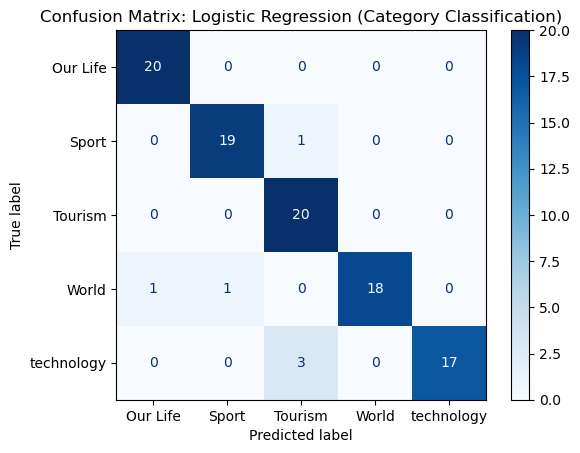

<Figure size 800x600 with 0 Axes>

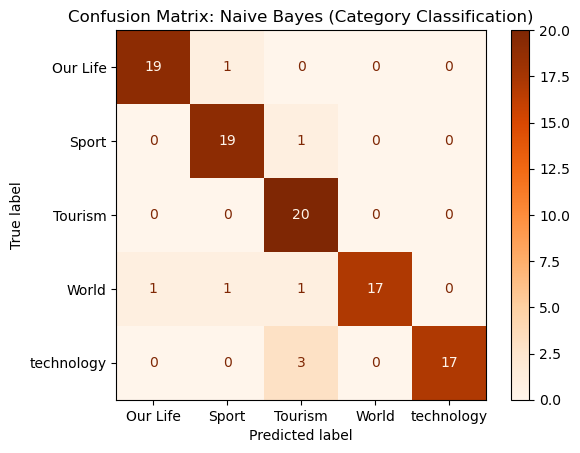

<Figure size 800x600 with 0 Axes>

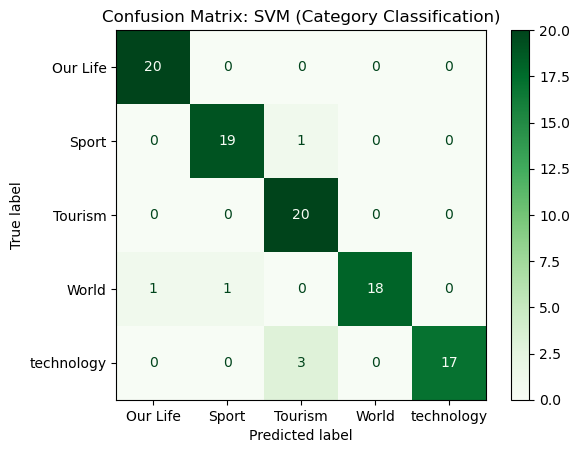

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, title, cmap):
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(
        estimator=model,
        X=X_test_tfidf,                 # Test data
        y=y_test,                       # True labels
        display_labels=category_encoder.classes_,  # Category names
        cmap=cmap,
        values_format='d'
    )
    plt.title(title)
    plt.show()

# Confusion Matrices for each model
plot_confusion_matrix(best_logistic_model, "Confusion Matrix: Logistic Regression (Category Classification)", plt.cm.Blues)
plot_confusion_matrix(best_nb_model, "Confusion Matrix: Naive Bayes (Category Classification)", plt.cm.Oranges)
plot_confusion_matrix(best_svm_model, "Confusion Matrix: SVM (Category Classification)", plt.cm.Greens)


# Voting Classifier: SVM, Logistic Regression, Naive Bayes

Classification Report - Voting Classifier (SVM + Logistic + Naive Bayes):
              precision    recall  f1-score   support

    Our Life       0.95      1.00      0.98        20
       Sport       0.95      0.95      0.95        20
     Tourism       0.83      1.00      0.91        20
       World       1.00      0.90      0.95        20
  technology       1.00      0.85      0.92        20

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



<Figure size 800x600 with 0 Axes>

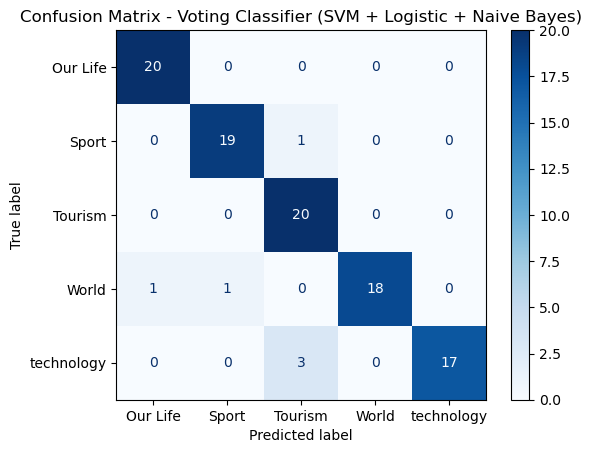

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
file_path = r"C:\Users\rasha\Downloads\Sapaq news headlines.xlsx"
sheet_name = "Cleaned Data"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Features and targets
X = data['News Headlines']
y = data['category']

# Encode target variables
category_encoder = LabelEncoder()
y = category_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define individual models
svm_model = SVC(C=10, kernel='linear', probability=True, random_state=42)
logistic_model = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
nb_model = MultinomialNB(alpha=0.1)

# Create Voting Classifier
voting_ensemble = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('logistic', logistic_model),
        ('naive_bayes', nb_model)
    ],
    voting='soft'
)

# Train the Voting Classifier
voting_ensemble.fit(X_train_tfidf, y_train)

# Predict on the test set
y_ensemble_pred = voting_ensemble.predict(X_test_tfidf)

# Evaluate the ensemble model
print("Classification Report - Voting Classifier (SVM + Logistic + Naive Bayes):")
print(classification_report(y_test, y_ensemble_pred, target_names=category_encoder.classes_))

# Plot confusion matrix function
def plot_confusion_matrix(model, X_test, y_test, labels, title, cmap):
    """
    Plots the confusion matrix for a given model.
    
    Parameters:
    model: The trained model to evaluate.
    X_test: Test data (features).
    y_test: True labels for the test set.
    labels: Class labels for display.
    title: The title of the plot.
    cmap: The colormap for the plot.
    """
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(
        estimator=model,
        X=X_test,
        y=y_test,
        display_labels=labels,
        cmap=cmap,
        values_format='d'
    )
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for Voting Classifier
plot_confusion_matrix(
    model=voting_ensemble,
    X_test=X_test_tfidf,
    y_test=y_test,
    labels=category_encoder.classes_,
    title="Confusion Matrix - Voting Classifier (SVM + Logistic + Naive Bayes)",
    cmap=plt.cm.Blues
)
